In [62]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress


In [64]:
# csv_file pathing
fertility_rate_path = "Resource/fred_fertility_rates.csv"
living_arrangements_path = "Resource/census_living_arrangements.csv"
living_arrangements_decade_path = "Resource/census_living_arrangements_by_decade.csv"
marital_status_path = "Resource/marital status overtime.csv"
age_fertility_path = "Resource/Age_Fertility.csv"
education_path = "Resource/Female Education Attainment Level.csv"


In [65]:
# Raw DataFrame Prep: Fertility Rates

# Read csv, drop na
fertility_rate_df = pd.read_csv(fertility_rate_path).dropna()

# Clean data
fertility_rate_df['DATE'] = pd.to_datetime(fertility_rate_df['DATE'].str.strip(), format='%d/%m/%Y').dt.year
fertility_rate_df.rename(columns = {'SPDYNTFRTINUSA':'fertility_rate','DATE':'Year'}, inplace = True) 

# Print and display
print(f'{len(fertility_rate_df)} records')
fertility_rate_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# fertility_rate_df.to_csv("Output/fertility_rate.csv", index=False, header=True)


59 records


,Year,fertility_rate
0,1960,3.654
1,1961,3.620
2,1962,3.461
3,1963,3.319
4,1964,3.190


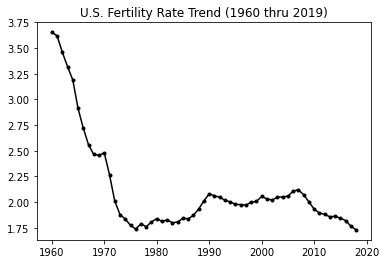

In [66]:
# Fertility Rate Trend over Time

# Variables to Compare
x_values = fertility_rate_df['Year']
y_values = fertility_rate_df['fertility_rate']

plt.plot(x_values, y_values, marker ='.', color = "black", label = 'Fertility Rate')
plt.title("U.S. Fertility Rate Trend (1960 thru 2019)")
plt.savefig('Output\FertilityRateTrendChart.png')


## Fertility Rate vs Living Arrangements

In [67]:
# Raw DataFrame Prep: Living Arrangements

# Read csv, drop na
living_arrangements_df = pd.read_csv(living_arrangements_path).dropna()

# Merge with fertility rates
merge_living_df = pd.merge(fertility_rate_df, living_arrangements_df, on = "Year", how = "outer").dropna()

# Add additional columns, format... 
other_ttl = merge_living_df['father_only'] + merge_living_df['other_relatives'] + merge_living_df['non_relatives']
merge_living_df['other']= other_ttl

pct_mother_only = (merge_living_df['mother_only'] / merge_living_df['under_18']).astype(float)
pct_two_parents = (merge_living_df['two_parents'] / merge_living_df['under_18']).astype(float)
pct_other = (merge_living_df['other'] / merge_living_df['under_18']).astype(float)

merge_living_df['pct_mother_only']= pct_mother_only.astype(float)
merge_living_df['pct_two_parents']= pct_two_parents.astype(float)
merge_living_df['pct_other']= pct_other.astype(float)
                                         
merge_living_df.head()

#.map("{:,.0%}".format)

,Year,fertility_rate,under_18,two_parents,mother_only,father_only,other_relatives,non_relatives,other,pct_mother_only,pct_two_parents,pct_other
0,1960,3.654,63727.0,55877.0,5105.0,724.0,1601.0,420.0,2745.0,0.080107,0.876818,0.043074
8,1968,2.464,70326.0,60030.0,7556.0,776.0,1660.0,304.0,2740.0,0.107442,0.853596,0.038961
9,1969,2.456,70317.0,59857.0,7744.0,765.0,1602.0,349.0,2716.0,0.110130,0.851245,0.038625
10,1970,2.480,69162.0,58939.0,7452.0,748.0,1546.0,477.0,2771.0,0.107747,0.852188,0.040065
11,1971,2.266,70255.0,58606.0,8714.0,764.0,1707.0,464.0,2935.0,0.124034,0.834190,0.041776


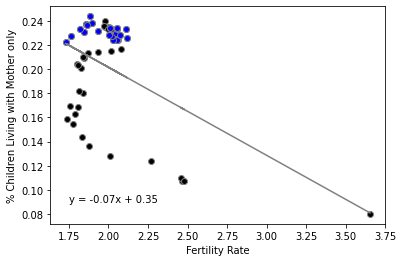

What is the correlation between fertility rate and % of Children under 18 living with their mother only?
Their is a moderate correlation between fertility rate and children under 18 living with only their moms of -0.17.
This data is collected from 1960 thru 2019 however we only have 1 data point in the 1960's decade.
Data Source: US Census Bureau


<Figure size 432x288 with 0 Axes>

In [90]:
# Living Arrangements Scatter Chart (Population Set)

# Variables to Compare
x_values = merge_living_df['fertility_rate']
y_values = merge_living_df['pct_mother_only']

# Scatter Chart
plt.scatter(x_values, y_values, marker="o", facecolors="black", edgecolors="gray")

# Linear Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-", color = "gray")
plt.annotate(line_eq,(1.75,.09),fontsize=10,color="black")

# Sample Population
sample_df = merge_living_df[-20:]

# Variables to Compare
x_values = sample_df['fertility_rate']
y_values = sample_df['pct_mother_only']

# Scatter Chart
plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="gray")



# Labels and Display
plt.xlabel('Fertility Rate')
plt.ylabel('% Children Living with Mother only')
plt.show()

plt.savefig('Output\ScatterPlot_MotherOnlyLiving.png')

# Correlation Coefficient
correlation = st.pearsonr(x_values, y_values)
print(f"What is the correlation between fertility rate and % of Children under 18 living with their mother only?")
print(f"Their is a moderate correlation between fertility rate and children under 18 living with only their moms of {round(correlation[0],2)}.")
print(f"This data is collected from 1960 thru 2019 however we only have 1 data point in the 1960's decade.")
print(f"Data Source: US Census Bureau")

In [82]:
# Calculate the population mean for Living Arrangements = Mother Only (entire population)
population = merge_living_df['pct_mother_only']
population_mean = population.mean()

# Calculate the population mean for Living Arrangements = Mother Only over last 20 years
sample_df = merge_living_df[-20:]
sample = sample_df['pct_mother_only']
sample_mean = sample.mean()

stats.ttest_1samp(sample, population_mean)

Ttest_1sampResult(statistic=24.26411898862151, pvalue=9.244269763354844e-16)

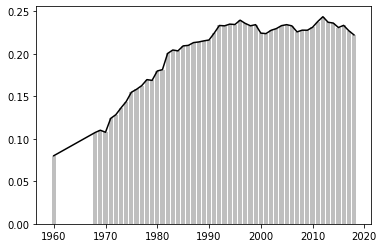

In [74]:
# Living Arrangements Bar Chart
x_values = merge_living_df['Year']
y_values = merge_living_df['pct_mother_only']

plt.bar(x_values, y_values, color='gray', alpha=0.5, align="center")
plt.plot(x_values, y_values, color = 'black')

plt.savefig('Output\MotherOnlyLiving_barchart.png')


## Fertility Rate vs Marital Status

In [ ]:
# Raw DataFrame Prep: Marital Status

# Read csv, drop na
marital_status_df = pd.read_csv(marital_status_path).dropna()

# Merge with fertility rates
merge_marital_df = pd.merge(fertility_rate_df, marital_status_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_marital_df)} records')
merge_marital_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_marital_df.to_csv("Output/marital_status.csv", index=False, header=True)


## Fertility Rate vs Age

In [ ]:
# Raw DataFrame Prep: Fertility by Age

# Read csv
age_fertility_df = pd.read_csv(age_fertility_path)

# Clean
age_fertility_df = age_fertility_df[['Year', 'Age 10-14 Years', 'Age 15-19 Years', 'Age 20-24 Years',
                           'Age 25-29 Years', 'Age 30-34 Years', 'Age 35-39 Years', 'Age 40-44 Years', 'Age 45-49 Years']]

# Merge with fertility rates
merge_age_df = pd.merge(fertility_rate_df, age_fertility_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_age_df)} records')
merge_age_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_age_df.to_csv("Output/fertility_age.csv", index=False, header=True)


## Fertility Rate vs Education

In [ ]:
# Raw DataFrame Prep: Female Education Attainment Level

# Read csv and drop na
education_df = pd.read_csv(education_path).dropna()

# Clean
education_df.rename(columns = {'Years':'Year'}, inplace=True)

# Merge with fertility rates
merge_education_df = pd.merge(fertility_rate_df, education_df, on="Year", how="outer")

# Print and display
print(f'{len(merge_education_df)} records')
merge_education_df.head()

# Print to csv - remove hashmark in front of below code to export to csv
# merge_education_df.to_csv("Output/education.csv", index=False, header=True)
